### Решение модельного уравнения

Необходимо решить модельное уравнение:
$$
\begin{align}
\label{eq:dalq}
u'(t) = \lambda u(t)
\end{align}
$$
с начальным условием $u(0) = 1$ с помошью явного и неявного метода Эйлера. Считать, что $\lambda = -200$. Провести расчеты на сетке с числом узлов $N = 1001; 101; 100$. Построить графики решения на одном рисунке, объяснить результат. А именно объяснить, что мы видим на графике для каждого случая, какое это имеет отношение к А-устойчивости, почему именно так. Если поведение графиков отличается, объяснить чем вызвано отличие.

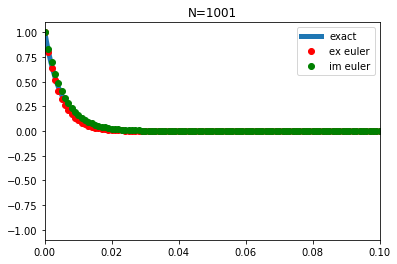

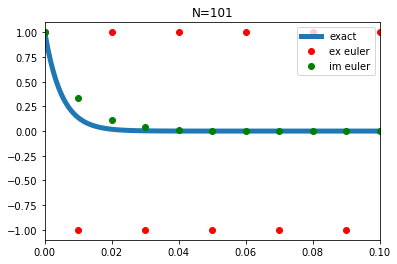

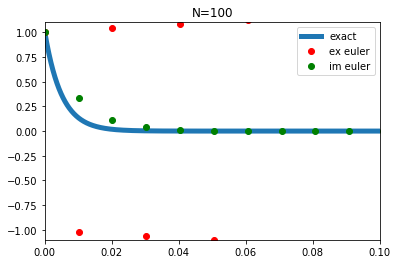

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#для модельного уравнения
#explicit Euler method
def ex_euler(u, l, h, N):
    for i in range(0, N-1):
        u[i+1] = (1+l*h)*u[i]

#implicit  Euler method      
def im_euler(u, l, h, N):
    for i in range(0, N-1):
        u[i+1] = 1/(1-l*h) * u[i]

def graph(N):
    T = 1 # считае до этого момента
    h = T/(N-1)
    x = np.linspace(0,T,N) # сетка
    x_teor = np.linspace(0,T,(N-1)*100+1) # сетка для точного решения
    l = -200

    u1 = np.zeros(N)
    u1[0] = 1 #начальное условие
    ex_euler(u1, l, h, N)
    u2 = np.zeros(N)
    u2[0] = 1 #начальное условие
    im_euler(u2, l, h, N)

    plt.plot(x_teor, np.exp(l*x_teor), linewidth=5.0, label='exact')
    plt.plot(x, u1, 'ro', label='ex euler')
    plt.plot(x, u2, 'go', label='im euler')
    plt.legend()
    plt.axis([0, 0.1, -1.1, 1.1])
    plt.title("N="+str(N))
    plt.show()
    
graph(1001)
graph(101)
graph(100)

Функция устойчивости для неявного метода Эйлера: $$R(z) = \Big|\dfrac{1}{1-z}\Big|$$ Тогда область устойичвости будет: $$R(z) \leq 1 \Leftrightarrow |1-z|=(1-x)^2+y^2\geq 1$$
Т.е. вся левая комплексная полуплоскость входит ($Re z \leq 0$), поэтому метода А-устойчив, что мы и видим на трех графиках, т.к. сходимость не меняется в зависимости от шагов (отсутсвует ограничение на шаг)

Функция устойчивости для яного метода $$R(z) = |1+z|$$
Из поиска области устойчивости можем сделать ограничение на шаг $$ h \leq \dfrac{2}{|\lambda|}$$
На графиках явно видно, что при N=1001 (h=0.001) у нас ошибка экпоненциально уменьшается и решение сходится. При N=101 (h=0.01) на границе происходят осцилляции 1 и -1, а при N=100  (h$\approx$ 0.010101$) численное решение растет и не приближает точное

### L-устойчивость

Рассматриваем задачу $u' = l(u-cos(t)) - sin(t)$. Для начального условия $u(0) = 1$ решение $u(t) = cos(t)$. Для начального условия  $u(0) = g$ решение $u(t) = e^{lt}(g-1) + cos(t)$. Решите задачу на сетке с шагом $h = 0.1$ для начального условия $u(0) = 1$ и $u(0) = 1.5$ методом Эйлера и методом трапеции. В качестве решения постройте две картинки для разных начальных условий. На каждой картинке должно быть два графика для каждого из методов и сравнение с точным решением. Объясните получившиеся результаты. Как они согласуются с теорией? При чем тут L-устойчивость? 

Метод трапеции $$ \frac{u_{n+1} - u_n}{h} = \frac{f(t_n, u_n)+f(t_{n+1}, u_{n+1})}{2}. $$


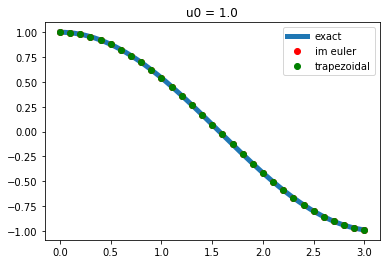

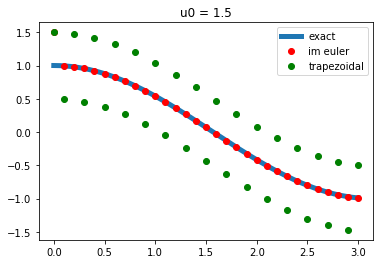

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#implicit  Euler method      
def im_euler(u, l, h, N):
    for i in range(0, N-1):
        u[i+1] = (u[i]-l*h*np.cos((i+1)*h)-h*np.sin((i+1)*h))/(1-l*h)

#trapezoidal method
def trapezoidal(u, l, h, N):
    for i in range(0, N-1):
        free = l*(np.cos((i+1)*h)+np.cos(i*h))+(np.sin((i+1)*h)+np.sin(i*h))
        u[i+1] = (u[i]*(1+l*h/2)-h/2*free)/(1-l*h/2)

T = 3
N = 31
h = T/(N-1)
x_teor = np.linspace(0,T,(N-1)*100+1) 
x = np.linspace(0,T,N)
l = -1e6

u1 = np.zeros(N)
#initial condition
u1[0] = 1
#u1[0] = 1.5

u2 = np.zeros(N)
#initial condition
u2[0] = 1
#u2[0] = 1.5

im_euler(u1, l, h, N)
trapezoidal(u2, l, h, N)

plt.plot(x_teor, np.cos(x_teor), linewidth=5.0, label='exact')
plt.plot(x, u1, 'ro', label='im euler')
plt.plot(x, u2, 'go', label='trapezoidal')
plt.legend()
plt.title("u0 = 1.0")
plt.show()

u1 = np.zeros(N)
#initial condition
#u1[0] = 1
u1[0] = 1.5

u2 = np.zeros(N)
#initial condition
#u2[0] = 1
u2[0] = 1.5

im_euler(u1, l, h, N)
trapezoidal(u2, l, h, N)

plt.plot(x_teor, np.cos(x_teor), linewidth=5.0, label='exact')
plt.plot(x, u1, 'ro', label='im euler')
plt.plot(x, u2, 'go', label='trapezoidal')
plt.legend()
plt.title("u0 = 1.5")
plt.show()


У неявного метода Эйлера есть L-устойчивость, а у метода трапеций - нет $$ R(z) = \dfrac{2+z}{2-z}$$
Поэтому R(z) не стремится к 0 (при $z\rightarrow + \infty$), поэтому метод трапеций может осциллировать при разных начальных условия (как на втором графике)